In [130]:
#loading packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder


In [112]:
df = pd.read_csv('base_train.csv', sep=',')

In [113]:
print(f"Cantidad de filas : {df.shape[0]}")
print(f"Cantidad de columnas : {df.shape[1]}")

Cantidad de filas : 31478
Cantidad de columnas : 21


In [104]:
def plot_dist(val):
    
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # assigning a graph to each ax
    sns.boxplot(x =val, ax=ax_box)
    sns.distplot(val, ax=ax_hist)
    plt.show()

#### EDAD

- tenemos valores outliers en la variable edad, valore mayores a 65 y menores a 21. Por el momento se desconoce el origen de esto ya que puede ser por error humano, casos muy atipicos o mal llenado de informacion del cliente. En esta situacion al ser pocos los valores con errores se optará por eliminar estas observaciones con el fin de no alterar la distribución con inputacion del promedio o mediana.

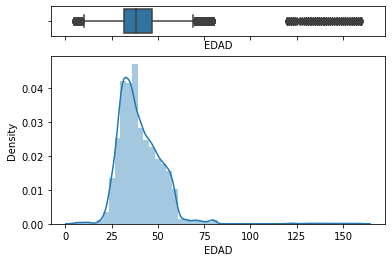

In [115]:
plot_dist(df['EDAD'])

In [109]:
df

,ID,EDAD,TRABAJO,ESTADO_CIVIL,EDUCACION,INCUMPLIMIENTO,VIVIENDA,PRESTAMO,TIPO_CONTACTO,MES,...,NRO_DIAS_CONTACTO,CONTACTOS_PREVIOS,RESULT_PREVIO,TASA_VAR_EMP,IPC,ICC,INGRESO,MONTO_DEUDA,MONTO_TRANSAC,ACEPTACION
0,24004,27,self-employed,single,university.degree,no,no,no,telephone,aug,...,999,0,nonexistent,-0.1,93.798,-40.4,1285.0,24260.770530,5242.101608,0
1,24003,43,technician,single,professional.course,no,no,no,telephone,aug,...,999,0,nonexistent,-0.1,93.798,-40.4,1287.0,28980.094570,5538.942316,0
2,23998,44,admin.,married,high.school,no,yes,no,telephone,aug,...,999,0,nonexistent,-0.1,93.798,-40.4,1153.0,10937.494260,7630.664800,0
3,24005,46,admin.,divorced,high.school,no,yes,no,telephone,aug,...,999,0,nonexistent,-0.1,93.798,-40.4,1125.0,29232.603680,7008.855259,0
4,23999,42,admin.,married,high.school,no,yes,yes,telephone,aug,...,999,0,nonexistent,-0.1,93.798,-40.4,1443.0,32636.302790,3012.416629,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31473,39392,56,admin.,single,university.degree,no,yes,no,cellular,mar,...,999,1,failure,-1.8,93.369,-34.8,16178.0,12775.634390,7898.585641,0
31474,39389,56,unemployed,divorced,basic.4y,no,yes,no,cellular,mar,...,999,1,failure,-1.8,93.369,-34.8,16373.0,8598.471103,2872.732652,1
31475,39391,56,admin.,single,university.degree,no,yes,no,cellular,mar,...,999,1,failure,-1.8,93.369,-34.8,16463.0,10292.031260,1787.767146,1
31476,39387,64,retired,marrid,basic.4y,no,yes,no,cellular,mar,...,999,0,nonexistent,-1.8,93.369,-34.8,16102.0,30125.652460,6309.825501,1


In [119]:
df = df[(df['EDAD'] <65) & (df['EDAD'] >20)]

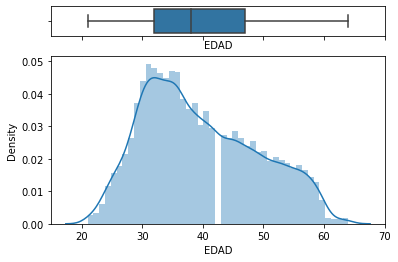

In [120]:
plot_dist(df['EDAD'])

#### trabajo

In [121]:
df.TRABAJO.value_counts()

admin.           7870
blue-collar      7034
technician       5104
services         2988
management       2204
self-employed    1096
entrepreneur     1092
retired           883
housemaid         779
unemployed        761
student           545
unknown           246
Name: TRABAJO, dtype: int64

In [124]:
df.groupby('TRABAJO').ACEPTACION.count().sort_values(ascending=False)

TRABAJO
admin.           7870
blue-collar      7034
technician       5104
services         2988
management       2204
self-employed    1096
entrepreneur     1092
retired           883
housemaid         779
unemployed        761
student           545
unknown           246
Name: ACEPTACION, dtype: int64

In [123]:
df.groupby('TRABAJO').ACEPTACION.mean().sort_values(ascending=False)

TRABAJO
student          0.289908
retired          0.140430
unemployed       0.137976
admin.           0.132529
technician       0.107367
self-employed    0.104015
management       0.103448
unknown          0.097561
housemaid        0.082157
entrepreneur     0.078755
services         0.075301
blue-collar      0.069235
Name: ACEPTACION, dtype: float64

In [29]:
df['TRABAJO'] = df.groupby('TRABAJO')['ID'].transform('count').astype('int')

#### ESTADO CIVIL

In [125]:
df = df.replace({'ESTADO_CIVIL':{' married':'married', 'marrid': 'married','singgle ':'single'
                            ,'single ': 'single', 'divorced ':'divorced','d_ivorced': 'divorced'}})

In [128]:
df.ESTADO_CIVIL.value_counts()

married     18584
single       8610
divorced     3349
Name: ESTADO_CIVIL, dtype: int64

In [129]:
df.groupby('ESTADO_CIVIL').ACEPTACION.mean()

ESTADO_CIVIL
divorced    0.086892
married     0.093737
single      0.135075
Name: ACEPTACION, dtype: float64

In [131]:
pd.get_dummies(df['ESTADO_CIVIL'])

,divorced,married,single
0,0,0,1
1,0,0,1
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
31473,0,0,1
31474,1,0,0
31475,0,0,1
31476,0,1,0


In [127]:
df = df[df['ESTADO_CIVIL'] != 'unknown']

In [137]:
df = pd.concat([df.drop(columns='ESTADO_CIVIL', axis=1),pd.get_dummies(df['ESTADO_CIVIL'])], axis=1)

<AxesSubplot:xlabel='ESTADO_CIVIL', ylabel='count'>

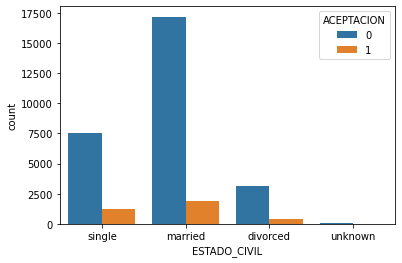

In [77]:
sns.countplot(df.ESTADO_CIVIL, hue=df.ACEPTACION
              )

#### EDUCACION

<AxesSubplot:xlabel='ACEPTACION', ylabel='count'>

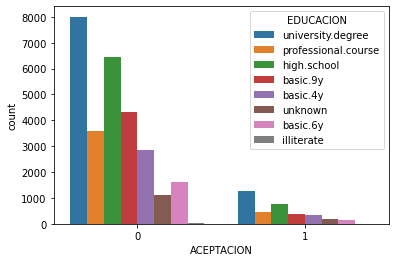

In [62]:
sns.countplot(df.ACEPTACION, hue=df.EDUCACION)

---

In [65]:
df.INCUMPLIMIENTO.value_counts()

no         24909
unknown     6566
yes            3
Name: INCUMPLIMIENTO, dtype: int64

In [66]:

df.VIVIENDA.value_counts()

yes        16507
no         14233
unknown      738
Name: VIVIENDA, dtype: int64

In [67]:
df.PRESTAMO.value_counts()

no         25997
yes         4743
unknown      738
Name: PRESTAMO, dtype: int64

In [68]:
df.TIPO_CONTACTO.value_counts()

cellular     19964
telephone    11514
Name: TIPO_CONTACTO, dtype: int64

In [69]:
df.MES.value_counts()

may    10535
sep     5463
oct     4721
jun     4047
nov     3099
apr     2030
aug      559
jul      441
mar      430
dec      153
Name: MES, dtype: int64

In [74]:
df.RESULT_PREVIO.value_counts()

nonexistent    27136
failure         3281
success         1061
Name: RESULT_PREVIO, dtype: int64

In [76]:
df.select_dtypes('object')

,ESTADO_CIVIL,EDUCACION,INCUMPLIMIENTO,VIVIENDA,PRESTAMO,TIPO_CONTACTO,MES,RESULT_PREVIO
0,single,university.degree,no,no,no,telephone,aug,nonexistent
1,single,professional.course,no,no,no,telephone,aug,nonexistent
2,married,high.school,no,yes,no,telephone,aug,nonexistent
3,divorced,high.school,no,yes,no,telephone,aug,nonexistent
4,married,high.school,no,yes,yes,telephone,aug,nonexistent
...,...,...,...,...,...,...,...,...
31473,single,university.degree,no,yes,no,cellular,mar,failure
31474,divorced,basic.4y,no,yes,no,cellular,mar,failure
31475,single,university.degree,no,yes,no,cellular,mar,failure
31476,married,basic.4y,no,yes,no,cellular,mar,nonexistent
